In [ ]:
# This takes metallicities from Layden 94 and converts them into a "net" high-res 
# literature value, based on our mapping in the style of Chadid+ 2017
# (Note this is not the [Fe/H] retrieval with our calibration; it's just the next 
# high-res value)

# Created 2022 Aug 2 by E.S.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# set linear relation values, based on >200 data points, offsets, and best-fitting 
# using error in x and y in Matlab

m_matlab = 1.1215
b_matlab = 0.029461
sigma_m_matlab = 0.0254
sigma_b_matlab = 0.0367

In [3]:
file_name = "/Users/bandari/Documents/git.repos/rrlfe/src/high_res_feh/layden_1994_abundances.dat"
df_layden = pd.read_csv(file_name)

In [12]:
df_layden.keys()

Index(['name_match', 'feh', 'err_feh', 'err_mapped', 'feh_mapped',
       'err_feh_mapped'],
      dtype='object')

In [5]:
def prop_err_feh(feh_lay, err_feh_lay, m, err_m, err_b):
    '''
    Finds error on mapped [Fe/H], given uncertainties in
    1. Layden 94 value
    2. slope of previously-established fit
    3. y-intercept of " "
    
    INPUTS:
    feh_lay: Layden 94 [Fe/H] value
    err_feh_lay: error in "
    m: slope
    err_m: error in "
    b: y-intercept
    err_b: error in "
    '''
    
    sig_feh = np.sqrt(
                    np.add(
                        np.add(
                            np.multiply(np.power(feh_lay,2.),np.power(err_m,2.)),
                            np.multiply(np.power(m,2.),np.power(err_feh_lay,2.))
                        ),
                        np.power(err_b,2.)
                    )
                )

    return sig_feh

In [10]:
df_layden["feh_mapped"] = np.add(np.multiply(m_matlab,df_layden["feh"]),b_matlab)

In [11]:
df_layden["err_feh_mapped"] = prop_err_feh(feh_lay=df_layden["feh"], 
                             err_feh_lay=df_layden["err_feh"], 
                             m=m_matlab, 
                             err_m=sigma_m_matlab, 
                             err_b=sigma_b_matlab)

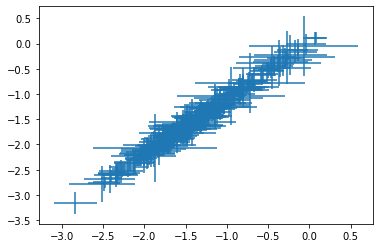

In [18]:
'''
plt.errorbar(df_layden["feh"], df_layden["feh_mapped"], 
             yerr=df_layden["err_feh"], xerr=df_layden["err_feh_mapped"], 
             linestyle="")
plt.show()
'''

In [ ]:
file_write = "junk_mapped_program_fehs.csv"
df_layden.to_csv(file_write)
print("Wrote " + file_write)